In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import requests
import time
import json
import string
from datetime import date 
from scipy.stats import linregress

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Notes: https://data.cdc.gov/Nutrition-Physical-Activity-and-Obesity/Nutrition-Physical-Activity-and-Obesity-Behavioral/hn4x-zwk7



In [20]:
#Import the API Key
data_df = pd.read_csv(r"Resources\Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System_20231101.csv")
#Add calculated number of obese people
data_df['calculated_num_obese'] = round(data_df['Sample_Size'] * data_df['Data_Value'] * .01)

In [21]:
list_of_categories = data_df['StratificationCategory1'].unique()
list_of_categories

array(['Race/Ethnicity', 'Education', 'Income', 'Age (years)', 'Gender',
       'Total', nan], dtype=object)

In [12]:
# Convert data into a Pandas DataFrame
data_df = data_df[['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','Race/Ethnicity','Education','Gender','StratificationCategory1','Stratification1']]

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88629 entries, 0 to 88628
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearEnd                  88629 non-null  int64  
 1   LocationAbbr             88629 non-null  object 
 2   Question                 88629 non-null  object 
 3   Data_Value               79851 non-null  float64
 4   Sample_Size              79851 non-null  float64
 5   Race/Ethnicity           25320 non-null  object 
 6   Education                12660 non-null  object 
 7   Gender                   6330 non-null   object 
 8   StratificationCategory1  88620 non-null  object 
 9   Stratification1          88620 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 6.8+ MB


In [15]:
#These are the questions this dataset answers
list_of_questions = data_df['Question'].unique()
print(sorted(list_of_questions))

['Percent of adults aged 18 years and older who have an overweight classification', 'Percent of adults aged 18 years and older who have obesity', 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)', 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week', 'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)', 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week', 'Percent of adults who engage in no leisure-time physical activity', 'Percent of adults who report consuming fru

In [16]:
overweight_df = data_df[data_df['Question'] == 'Percent of adults aged 18 years and older who have an overweight classification']

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,Race/Ethnicity,Education,Gender,StratificationCategory1,Stratification1,calculated_num_obese
3,2013,US,Percent of adults aged 18 years and older who ...,32.7,60069.0,NaN,NaN,NaN,Income,Data not reported,19643.0
6,2012,WY,Percent of adults aged 18 years and older who ...,48.5,69.0,American Indian/Alaska Native,NaN,NaN,Race/Ethnicity,American Indian/Alaska Native,33.0
11,2015,RI,Percent of adults aged 18 years and older who ...,40.2,354.0,Hispanic,NaN,NaN,Race/Ethnicity,Hispanic,142.0
16,2015,GU,Percent of adults aged 18 years and older who ...,NaN,NaN,Other,NaN,NaN,Race/Ethnicity,Other,NaN
21,2012,US,Percent of adults aged 18 years and older who ...,35.1,120032.0,NaN,Some college or technical school,NaN,Education,Some college or technical school,42131.0


In [33]:
obese_df = data_df[data_df['Question'] == 'Percent of adults aged 18 years and older who have obesity']

In [25]:
age_data_df = data_df.loc[:,['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]

age_data_df = age_data_df[age_data_df['YearEnd']==2021]
age_data_df = age_data_df[age_data_df['LocationAbbr']=='US']
age_data_df = age_data_df[age_data_df['StratificationCategory1']=='Age (years)']
age_data_df = age_data_df[age_data_df['Question']=='Percent of adults aged 18 years and older who have obesity']
age_data_df = age_data_df.sort_values(by='Stratification1', ascending=True)

age_data_df

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1
83687,2021,US,Percent of adults aged 18 years and older who ...,20.7,22944.0,Age (years),18 - 24
83935,2021,US,Percent of adults aged 18 years and older who ...,32.0,40994.0,Age (years),25 - 34
81888,2021,US,Percent of adults aged 18 years and older who ...,36.8,51179.0,Age (years),35 - 44
88500,2021,US,Percent of adults aged 18 years and older who ...,39.3,57677.0,Age (years),45 - 54
86979,2021,US,Percent of adults aged 18 years and older who ...,38.1,73358.0,Age (years),55 - 64
86562,2021,US,Percent of adults aged 18 years and older who ...,29.5,139052.0,Age (years),65 or older


Text(0, 0.5, 'Percent of Obese')

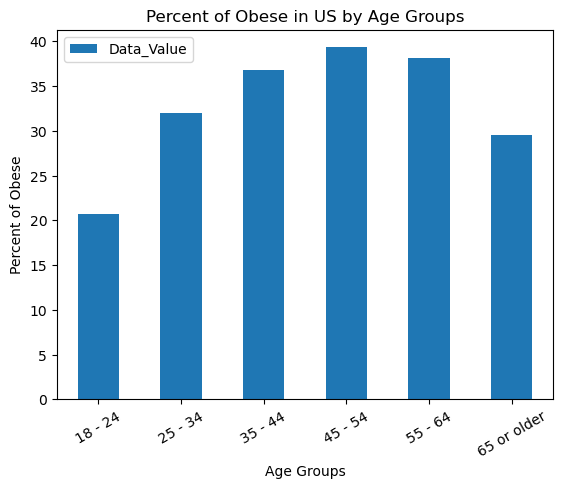

In [29]:
age_data_df.plot.bar(x='Stratification1', y='Data_Value')

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Percent of Obese in US by Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("Percent of Obese")


In [30]:
leisure_data_df = data_df.loc[:,['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]

leisure_data_df = leisure_data_df[leisure_data_df['YearEnd']==2021]
leisure_data_df = leisure_data_df[leisure_data_df['LocationAbbr']=='US']
#gender_data_df = gender_data_df[gender_data_df['StratificationCategory1']=='Gender']
leisure_data_df = leisure_data_df[leisure_data_df['StratificationCategory1']=='Income']
leisure_data_df = leisure_data_df[leisure_data_df['Question']== 'Percent of adults who engage in no leisure-time physical activity']
leisure_data_df = leisure_data_df.dropna()
leisure_data_df

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1
81199,2021,US,Percent of adults who engage in no leisure-tim...,31.7,43004.0,Income,"$25,000 - $34,999"
81986,2021,US,Percent of adults who engage in no leisure-tim...,17.6,47396.0,Income,"$75,000 or greater"
82958,2021,US,Percent of adults who engage in no leisure-tim...,27.0,47501.0,Income,"$35,000 - $49,999"
84046,2021,US,Percent of adults who engage in no leisure-tim...,20.3,58762.0,Income,"$50,000 - $74,999"
85199,2021,US,Percent of adults who engage in no leisure-tim...,39.9,21003.0,Income,"Less than $15,000"
87551,2021,US,Percent of adults who engage in no leisure-tim...,36.2,34769.0,Income,"$15,000 - $24,999"
88628,2021,US,Percent of adults who engage in no leisure-tim...,19.0,178279.0,Income,Data not reported


,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1
86562,2021,US,Percent of adults aged 18 years and older who ...,29.5,139052.0,Age (years),65 or older
86979,2021,US,Percent of adults aged 18 years and older who ...,38.1,73358.0,Age (years),55 - 64
88500,2021,US,Percent of adults aged 18 years and older who ...,39.3,57677.0,Age (years),45 - 54
81888,2021,US,Percent of adults aged 18 years and older who ...,36.8,51179.0,Age (years),35 - 44
83935,2021,US,Percent of adults aged 18 years and older who ...,32.0,40994.0,Age (years),25 - 34
83687,2021,US,Percent of adults aged 18 years and older who ...,20.7,22944.0,Age (years),18 - 24


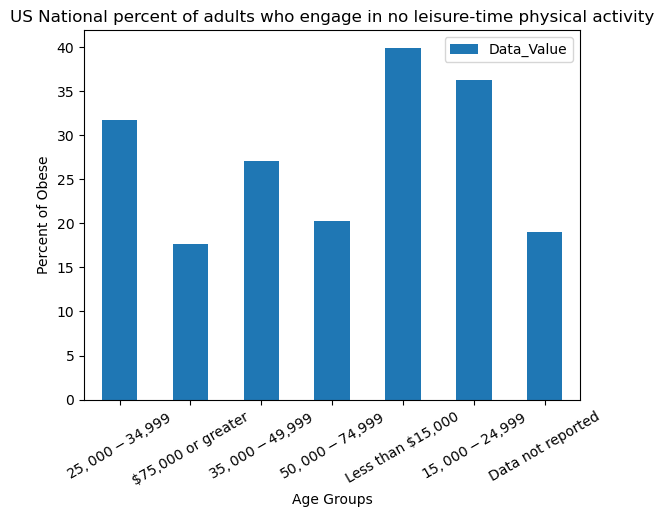

In [31]:
#Reorder the x-ticks
leisure_data_df.plot.bar(x='Stratification1', y='Data_Value')

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("US National percent of adults who engage in no leisure-time physical activity")
plt.xlabel("Age Groups")
plt.ylabel("Percent of Obese")

age_data_df.sort_values(by='Stratification1', ascending=False)

In [70]:
obese_df = data_df.loc[:,['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]
obese_df = obese_df[obese_df['YearEnd'] == 2020]
obese_df = obese_df[obese_df['LocationAbbr'] != 'US']
obese_df = obese_df[obese_df['LocationAbbr'] != 'VI']
obese_df = obese_df[obese_df['LocationAbbr'] != 'GU']
obese_df = obese_df[obese_df['LocationAbbr'] != 'DC']
obese_df = obese_df[obese_df['LocationAbbr'] != 'PR']
obese_df = obese_df[obese_df['StratificationCategory1'] == 'Total']
obese_df = obese_df[obese_df['Question'] == 'Percent of adults aged 18 years and older who have obesity']

obese_df.head()

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1
429,2020,AK,Percent of adults aged 18 years and older who ...,31.9,3335.0,Total,Total
5621,2020,MD,Percent of adults aged 18 years and older who ...,31.0,12562.0,Total,Total
5710,2020,VA,Percent of adults aged 18 years and older who ...,32.2,8568.0,Total,Total
5981,2020,OK,Percent of adults aged 18 years and older who ...,36.4,4530.0,Total,Total
6125,2020,FL,Percent of adults aged 18 years and older who ...,28.4,10591.0,Total,Total


In [87]:
#fig = px.choropleth(locations=obese_df['LocationAbbr'], locationmode="USA-states", color=obese_df['Data_Value'], scope="usa",color_continuous_scale='spectral_r')

fig = px.choropleth(obese_df,
                    locations= obese_df['LocationAbbr'],
                    color= obese_df['Data_Value'],
                    color_continuous_scale='spectral_r',
                    hover_name=obese_df['LocationAbbr'],
                    locationmode='USA-states',
                    #labels={'Current Unemployment Rate':'Unemployment Rate %'},
                    scope='usa')

fig.add_scattergeo(
    #locations=obese_df['LocationAbbr'],
    locationmode='USA-states',
    text=obese_df['LocationAbbr'],
    mode='text')

fig.update_layout(
    title={'text':'2020 Obesity Rates %',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.show()

In [39]:
list_of_questions = obese_df['StratificationCategory1'].unique()
print(sorted(list_of_questions))

['Age (years)', 'Education', 'Gender', 'Income', 'Race/Ethnicity', 'Total']
